In [44]:
# Using ARIMA model to forecast stock market returns and/or the stock price (if available)
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as tsa
import statsmodels.tsa.arima.model as arima
import statsmodels.graphics.tsaplots as tsaPlots
import yfinance as yf

In [45]:
# Import Data
# Importing stock data using yfinance

stockPrices = yf.download("C", start="2010-01-01")
stockPrices = stockPrices.dropna()
stockPrices = stockPrices.reset_index()
stockPrices = stockPrices.rename(columns={"Date": "date", "Open": "open", "High": "high", "Low": "low", "Close": "close", "Adj Close": "adjClose", "Volume": "volume"})

print(stockPrices.head())

[*********************100%%**********************]  1 of 1 completed

        date       open       high        low      close   adjClose    volume
0 2010-01-04  33.599998  34.099998  33.400002  34.000000  26.639046  40679350
1 2010-01-05  34.200001  35.500000  34.099998  35.299999  27.657597  66861710
2 2010-01-06  35.599998  36.799999  35.099998  36.400002  28.519447  67433890
3 2010-01-07  36.900002  37.000000  36.099998  36.500000  28.597809  67245190
4 2010-01-08  36.500000  36.700001  35.099998  35.900002  28.127699  62409770


C:\Users\isss1\AppData\Local\Temp\ipykernel_27080\524087955.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssResult = tsa.kpss(stockPrices['adjClose'])


ADF Result
(-2.2361669248346585, 0.19338170393304532, 29, 3576, {'1%': -3.4321799777078366, '5%': -2.8623485814137557, '10%': -2.567200421005185}, 9056.691037420369)
KPSS Result
(5.479080808762355, 0.01, 38, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


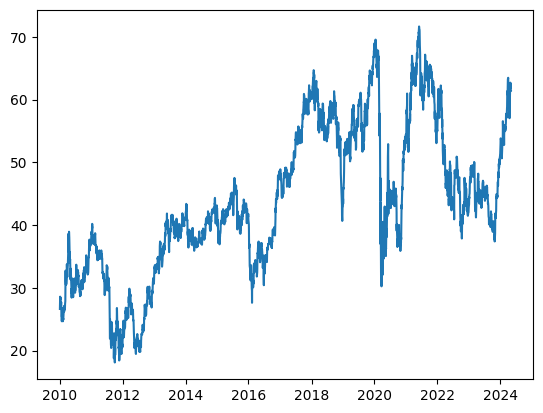

In [46]:
# Plot adjClose data
plt.plot(stockPrices['date'], stockPrices['adjClose'])

# Conduct ADF test to test if this this time-series process is stationary
adfResult = tsa.adfuller(stockPrices['adjClose'])
kpssResult = tsa.kpss(stockPrices['adjClose'])

print(f"ADF Result\n{adfResult}")
print(f"KPSS Result\n{kpssResult}")

# Results are consistent -- both conclude that this is a non-stationary process (need to first-difference).

        date       open       high        low      close   adjClose    volume   
1 2010-01-05  34.200001  35.500000  34.099998  35.299999  27.657597  66861710  \
2 2010-01-06  35.599998  36.799999  35.099998  36.400002  28.519447  67433890   
3 2010-01-07  36.900002  37.000000  36.099998  36.500000  28.597809  67245190   
4 2010-01-08  36.500000  36.700001  35.099998  35.900002  28.127699  62409770   
5 2010-01-11  36.599998  36.700001  36.000000  36.299999  28.441095  47557650   

   logAdjClose  logDifAdjClose  
1     3.319900        0.037522  
2     3.350586        0.030686  
3     3.353330        0.002744  
4     3.336755       -0.016575  
5     3.347835        0.011080  
ADF Result
(-11.41090748289407, 7.254591576965113e-21, 28, 3576, {'1%': -3.4321799777078366, '5%': -2.8623485814137557, '10%': -2.567200421005185}, -17336.193890453185)
KPSS Result
(0.026365219861389934, 0.1, 17, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\isss1\AppData\Local\Temp\ipykernel_27080\877141911.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssFirstDifResult = tsa.kpss(stockPrices['logDifAdjClose'])


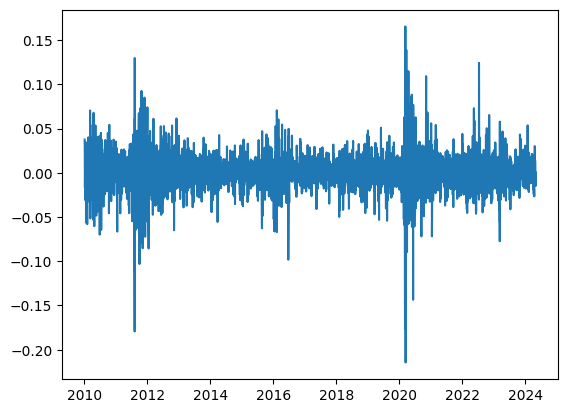

In [47]:
# Constructing a new variable to achieve a stationary process.
# Getting log difference approximation of percentage changes (a way of first differencing the data)
stockPrices['logAdjClose'] = np.log(stockPrices['adjClose'])
stockPrices['logDifAdjClose'] = stockPrices['logAdjClose'].diff()

# Dropping first row as it does not have a percentage change
stockPrices = stockPrices.dropna()

# View constructed data
print(stockPrices.head())
plt.plot(stockPrices['date'], stockPrices['logDifAdjClose'])

# Test to see if percentage returns process is stationary
adfFirstDifResult = tsa.adfuller(stockPrices['logDifAdjClose'])
kpssFirstDifResult = tsa.kpss(stockPrices['logDifAdjClose'])

print(f"ADF Result\n{adfFirstDifResult}")
print(f"KPSS Result\n{kpssFirstDifResult}")

# Results are consistent -- this first differenced data is stationary. We can perform statistical inference tests on this.

ACF Results
(array([ 1.00000000e+00, -5.65604687e-02,  6.36633552e-02, -2.14471454e-02,
       -6.65958797e-03, -2.39432603e-02, -4.33732906e-02,  8.45754736e-02,
       -1.69038804e-02,  2.51970923e-02,  3.78197010e-03,  3.42052967e-03,
        2.52205430e-02, -1.73657528e-02, -1.08347440e-02, -5.22730184e-02,
        3.56720064e-02, -8.43852668e-03, -2.22100039e-02, -1.38214137e-03,
        3.37002359e-02,  2.12227114e-02, -4.17754881e-02, -1.36925053e-02,
        2.10418024e-02, -5.88505433e-03, -2.82181036e-02,  4.78011436e-02,
       -1.02827336e-02, -2.89520833e-02,  1.29082395e-02, -2.23914972e-02,
       -1.14711434e-02, -8.99266434e-03,  4.69548680e-04, -1.18086492e-03]), array([[ 1.00000000e+00,  1.00000000e+00],
       [-8.92038739e-02, -2.39170634e-02],
       [ 3.09156874e-02,  9.64110230e-02],
       [-5.43264319e-02,  1.14321412e-02],
       [-3.95537787e-02,  2.62346028e-02],
       [-5.68388877e-02,  8.95236712e-03],
       [-7.62874831e-02, -1.04590981e-02],
       [ 

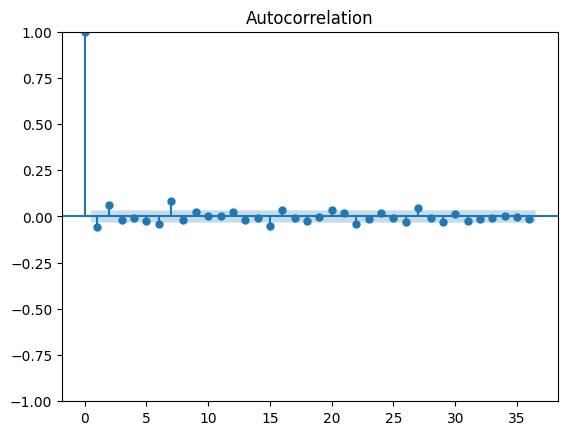

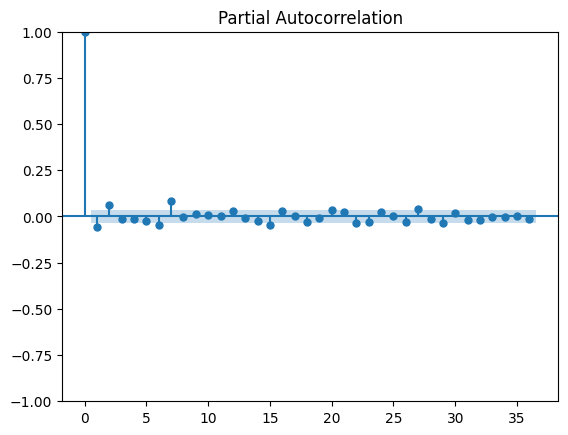

In [48]:
acfPlot = tsaPlots.plot_acf(stockPrices['logDifAdjClose'])
pacfPlot = tsaPlots.plot_pacf(stockPrices['logDifAdjClose'])

# Returns confidence intervals
# TODO: Will use this data to automatically determine p and q with an algorithm (in the full application)
acfResults = tsa.acf(stockPrices['logDifAdjClose'], alpha=0.05)
pacfResults = tsa.pacf(stockPrices['logDifAdjClose'], alpha=0.05)

print(f"ACF Results\n{acfResults}")
print(f"PACF Results\n{pacfResults}")

In [53]:
# Will construct a ARIMA model (with no differencing, since that has already been done) on the percentage change returns data

# TODO: Use information criteria to pick the order
arimaModel = arima.ARIMA(endog=stockPrices['logDifAdjClose'], order=(2, 0, 2)).fit()

print(arimaModel.summary())

c:\Users\isss1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\isss1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\isss1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         logDifAdjClose   No. Observations:                 3605
Model:                 ARIMA(2, 0, 2)   Log Likelihood                8723.854
Date:                Wed, 01 May 2024   AIC                         -17435.708
Time:                        23:50:07   BIC                         -17398.567
Sample:                             0   HQIC                        -17422.472
                               - 3605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.585      0.558      -0.001       0.001
ar.L1          0.0189      0.192      0.098      0.922      -0.358       0.396
ar.L2          0.2363      0.158      1.495      0.1

In [67]:
# Obtaining s-step ahead forecasts
# Note that ARIMA models are only good at short-term forecasts, so we will see the forecast converge to the mean as s increases

# TODO: Need to do an in-sample versus out-of-sample comparison to test the model
# 15 day forecast
stockReturnForecasts = arimaModel.forecast(15)

# TODO: Add Dates to Forecast so this can be concatenated later

print(f"Forecast Results:\n{stockReturnForecasts}")
print(f"Mean Stock Return: {stockPrices['logDifAdjClose'].mean()}")
print("The forecasts should eventually converge to the mean value listed above.")

# TODO: Create dataframe (below) with forecasted data
stockReturnsWithForecasts = pd.DataFrame(stockPrices, columns=['date', 'logDifAdjClose'])

# stockReturnsWithForecasts = pd.concat()

print(stockReturnsWithForecasts.tail(10))

Forecast Results:
3605   -0.000514
3606    0.000269
3607    0.000052
3608    0.000233
3609    0.000185
3610    0.000227
3611    0.000216
3612    0.000226
3613    0.000224
3614    0.000226
3615    0.000225
3616    0.000226
3617    0.000226
3618    0.000226
3619    0.000226
Name: predicted_mean, dtype: float64
Mean Stock Return: 0.00023140558190046606
The forecasts should eventually converge to the mean value listed above.
           date  logDifAdjClose
3596 2024-04-18        0.002575
3597 2024-04-19        0.013962
3598 2024-04-22        0.030146
3599 2024-04-23        0.027829
3600 2024-04-24       -0.003196
3601 2024-04-25       -0.010945
3602 2024-04-26        0.013982
3603 2024-04-29       -0.006404
3604 2024-04-30       -0.015050
3605 2024-05-01        0.000326


c:\Users\isss1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\isss1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
